In [234]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings

%matplotlib inline
warnings.filterwarnings("ignore")

In [235]:
# Load both 'customer_name.csv' and 'sanction_list.csv' into dataframes
customer_names = pd.read_csv('./customer_names.csv')
sanction_list = pd.read_csv('./sanctions_list.csv')

# Display customer_names
print('Customer Name Dataframe')
print(f'{customer_names.head()}\n')

# Display sanctions_list
print('Sanction List Dataframe')
print(f'{sanction_list.head()}\n')



Customer Name Dataframe
  CustomerID             Name
0   CUST0001   Anthony Cannon
1   CUST0002  Alexis Mitchell
2   CUST0003       Brent Neal
3   CUST0004   Timothy Gordon
4   CUST0005    Calvin Walker

Sanction List Dataframe
  SanctionID               Reason CustomerID
0    SANC146  Terrorist Financing   CUST2383
1    SANC292  Terrorist Financing   CUST3617
2    SANC199  Terrorist Financing   CUST2931
3    SANC060  Terrorist Financing   CUST3849
4    SANC271  Terrorist Financing   CUST0483



In [236]:
# Check number of nulls in customer names
customer_names.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   CustomerID  5000 non-null   object
 1   Name        5000 non-null   object
dtypes: object(2)
memory usage: 78.3+ KB


In [237]:
# Check number of nulls in sanction list
sanction_list.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 552 entries, 0 to 551
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   SanctionID  552 non-null    object
 1   Reason      552 non-null    object
 2   CustomerID  552 non-null    object
dtypes: object(3)
memory usage: 13.1+ KB


# Visualizations

## Distribution of Sanctioned Reason

<Figure size 640x480 with 0 Axes>

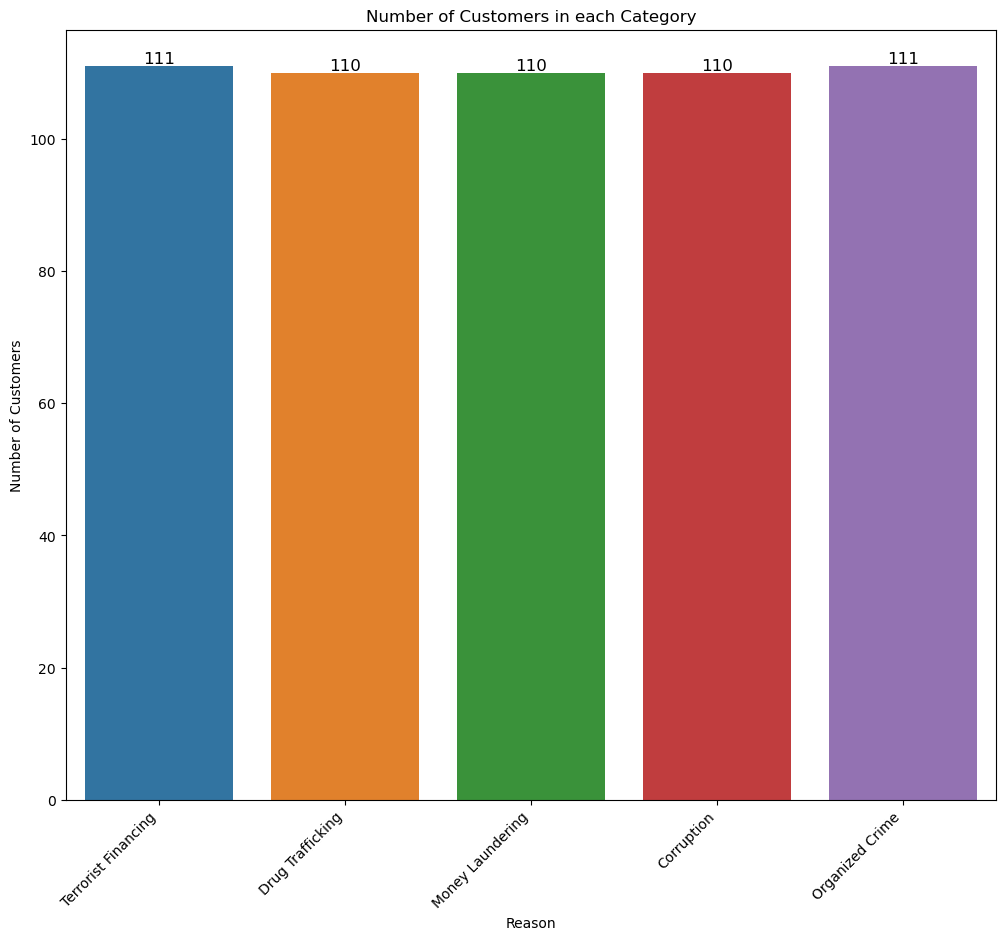

In [238]:
# Genearte a bar plot showing the count of each 'Reason' for sanctioning
plt.figure(figsize=(12, 10))
ax = sns.countplot(sanction_list, x='Reason',
                   hue='Reason')

# Add datapoints to graph 
for container in ax.containers:
    ax.bar_label(container, fontsize=12)

# Format graph
plt.title('Number of Customers in each Category')
plt.ylabel('Number of Customers')
# Rotate x-axis labels
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# Display
plt.show()
plt.tight_layout()

<Figure size 640x480 with 0 Axes>

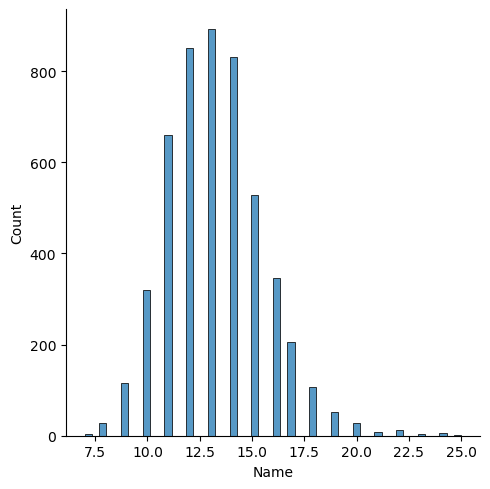

In [239]:
# Get the length of each person's name 
length_of_names = customer_names['Name'].apply(lambda x: len(x))

# Create a distribution plot based on the length
sns.displot(customer_names, x=length_of_names)
plt.show()
plt.tight_layout()

# Sanction List Dataframe

In [ ]:
# Create a new dataframe containing customer who appear on the sanction list
result = pd.merge(customer_names, sanction_list, how='inner', on='CustomerID')

# Rename column
customer_sanction_list = result.rename(columns={'CustomerID_x': 'CustomerID'})

# Display 
customer_sanction_list

,CustomerID,Name,SanctionID,Reason
0,CUST0003,Brent Neal,SANC070,Organized Crime
1,CUST0029,Taylor Smith,SANC463,Drug Trafficking
2,CUST0050,Sharon Moore,SANC446,Drug Trafficking
3,CUST0061,Adriana Rivers,SANC008,Terrorist Financing
4,CUST0068,Jennifer Murphy,SANC234,Drug Trafficking
...,...,...,...,...
547,CUST4915,Jodi Thompson,SANC523,Organized Crime
548,CUST4930,Mr. Fernando Mathis,SANC368,Organized Crime
549,CUST4950,Victoria Barrett,SANC490,Organized Crime
550,CUST4973,Samantha Perry,SANC429,Organized Crime
